 ## Exploratory Data Analysis

<b>Goal</b>: produce a statistical summary of the Iris dataset<br>
You can download the Iris data files from [this link](https://datahub.io/machine-learning/iris#data)

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. Fisher's paper was published in the Annals of Eugenics (today the Annals of Human Genetics) and includes discussion of the contained techniques' applications to the field of phrenology.

https://en.wikipedia.org/wiki/Iris_flower_data_set

### 1) Loading data

Task: use <em>pandas</em> and <em>scipy</em> to load Iris from csv, arff and json formats and convert them onto dataframes

In [4]:
import pandas as pd
  
# Reading the CSV file
df = pd.read_csv("iris.csv")

#You can oppen the data format cvs as well in excel

# Printing top 5 rows
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [198]:
# Reading the JSON file
df = pd.read_json("iris.json")
df.head()

,class,petallength,petalwidth,sepallength,sepalwidth
0,Iris-setosa,1.4,0.2,5.1,3.5
1,Iris-setosa,1.4,0.2,4.9,3.0
2,Iris-setosa,1.3,0.2,4.7,3.2
3,Iris-setosa,1.5,0.2,4.6,3.1
4,Iris-setosa,1.4,0.2,5.0,3.6


In [199]:
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('iris_arff.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2) Summaries

In [200]:
df.shape

(150, 5)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [202]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


How many observation do we have for each species?

In [203]:
df.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Let us remove two values from *sepalwidth*

In [204]:
import numpy as np
df.loc[0:1,'sepalwidth'] = np.nan

Are there missings per variable?

In [205]:
df.isnull().sum()

sepallength    0
sepalwidth     2
petallength    0
petalwidth     0
class          0
dtype: int64

We can choose to remove the rows or impute missings (e.g., *median* for numeric vars or *mode* for categoric)

In [206]:
df.dropna().head()

,sepallength,sepalwidth,petallength,petalwidth,class
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [207]:
from sklearn.impute import SimpleImputer

# imputation strategies: mean, median, most_frequent
imp = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True) 
df[['sepalwidth']] = imp.fit_transform(df[['sepalwidth']])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.051351,1.4,0.2,Iris-setosa
1,4.9,3.051351,1.4,0.2,Iris-setosa
2,4.7,3.200000,1.3,0.2,Iris-setosa
3,4.6,3.100000,1.5,0.2,Iris-setosa
4,5.0,3.600000,1.4,0.2,Iris-setosa


Are there duplicates?<br>
Let us check how many observations have different sepal length and width.

In [208]:
unique_sepal = df.drop_duplicates(subset=["sepallength","sepalwidth"])
unique_sepal.shape

(117, 5)

### 3) Simple visualization

Let us use <em>matplotlib</em>, <em>seaborn</em> and <em>plotly</em> to visualize info

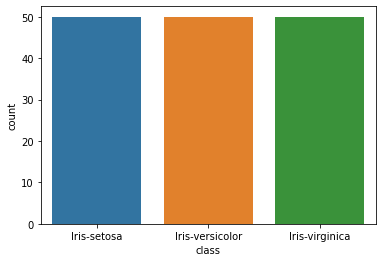

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.show()

Let us explore basic relationships between variables:<br>
- <em>setosa</em> has smaller sepal lengths but larger sepal widths, while <em>virginica</em> has larger sepal lengths but smaller sepal widths (first image)
- petal lengths and widths vary from smaller to larger for <em>setosa</em>, <em>versicolor</em> and <em>virginica</em> species (second image)

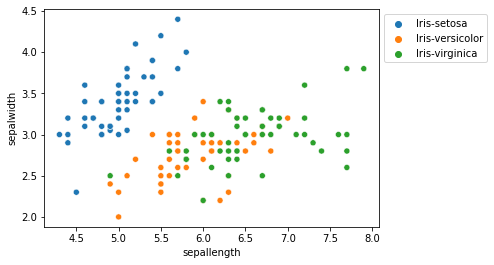

In [210]:
sns.scatterplot(x='sepallength', y='sepalwidth', hue='class', data=df)
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)  
plt.show()

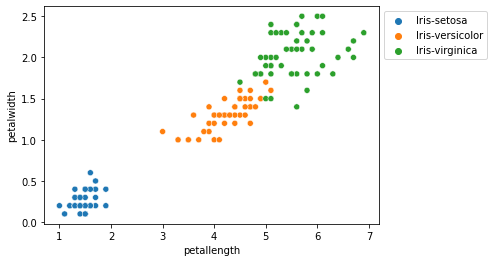

In [211]:
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

What about histogram views per variable?

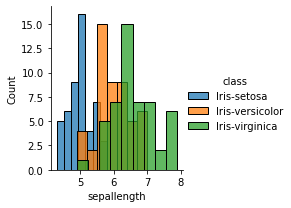

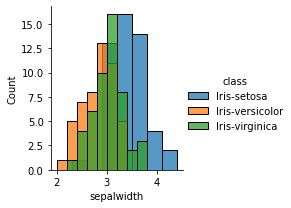

In [212]:
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepallength").add_legend()
  
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepalwidth").add_legend()
  
plt.show()

And boxplots?

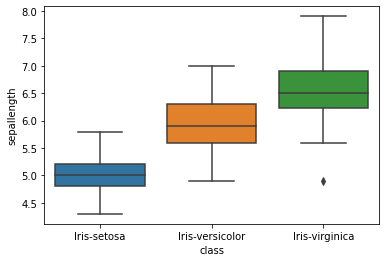

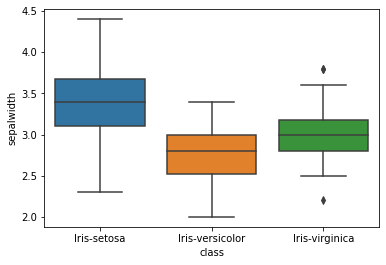

In [213]:
sns.boxplot(x="class", y='sepallength', data=df)      
plt.show()
sns.boxplot(x="class", y='sepalwidth', data=df)      
plt.show()

How to comprehensively display pairwise variable relationships?

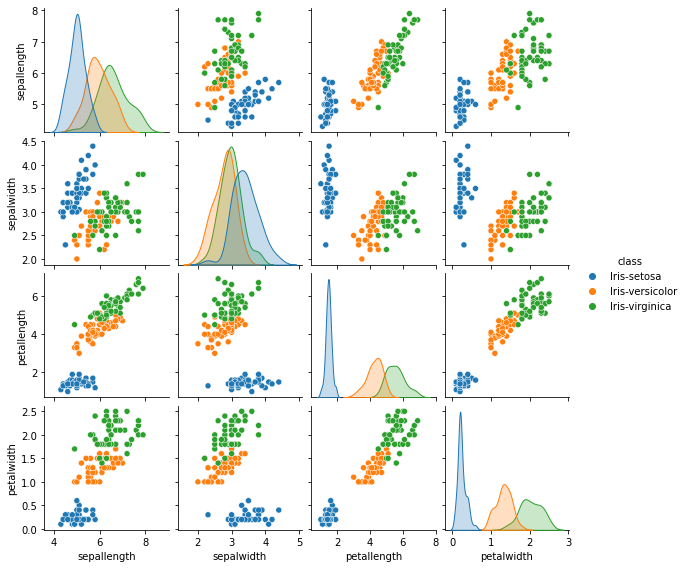

In [214]:
sns.pairplot(df, hue='class', height=2)

Are input variables correlated?

In [215]:
df.corr(method='pearson')

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.104420,0.871754,0.817954
sepalwidth,-0.104420,1.000000,-0.413796,-0.349766
petallength,0.871754,-0.413796,1.000000,0.962757
petalwidth,0.817954,-0.349766,0.962757,1.000000


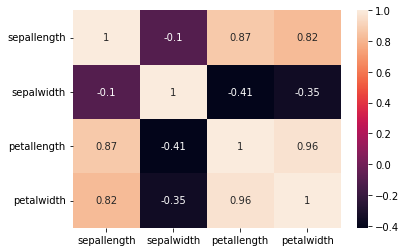

In [216]:
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

### 4) Keep going...

Some of the <em>sklearn</em> facilities require input data to be separated from output data

In [217]:
X = df.drop('class', axis=1)
y = df['class']

Let us for instance check the discriminative power of each feature in accordance with <em>f_classif</em> criterion

In [218]:
from sklearn.feature_selection import f_classif

fimportance = f_classif(X, y)

print('features', X.columns.values)
print('scores', fimportance[0])
print('pvalues', fimportance[1])

features ['sepallength' 'sepalwidth' 'petallength' 'petalwidth']
scores [ 119.26450218   45.89858536 1179.0343277   959.32440573]
pvalues [1.66966919e-31 3.25596403e-16 3.05197580e-91 4.37695696e-85]


### 5) Titanic

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We are using  a file small_titanic.cvs processed file that corresponds to the file train.cvs from kaggle https://www.kaggle.com/c/titanic/data?select=train.csv that contains data for $891$ of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including their $PassengerId$, whether they $Survived$, heir passenger-class $Pclass$, their $Name$, their $Sex$, their $Age$, and other six attributes

In [219]:
import pandas as pd, numpy as np

# read titanic data
data = pd.read_csv('small_titanic.csv')

#You can oppen the data format cvs as well in excel

data.shape

(891, 12)

In [220]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
data.info()
print('_'*40)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Some features are categorical, some other numerical

•	Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

•	Continous: Age, Fare. Discrete: SibSp, Parch.

In some data set the features are msssing and are wrong. Preparing a data set for machine learning task can take up to 90% of the whol development time. This task is called data cleaning and is adress in data science

Scikit-learn requires that all deatures are numeric...
We will come back to the titanic data set (data preparation) in N05_Classification notebook.

See as well https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

However, in the course we will not deal with data cleaning due to the lack of time.

We will use here seaborn for data visualization and graphical plotting. Seaborn is built on top of matplotlib with similar functionalities

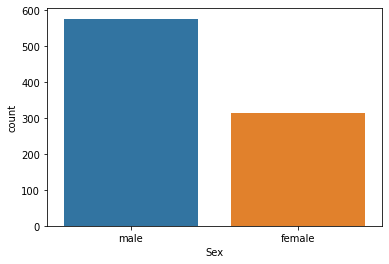

In [222]:
sns.countplot(x='Sex', data=data)
plt.show()

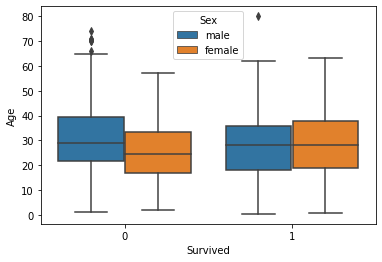

In [223]:
sns.boxplot(x='Survived', y='Age', hue="Sex",data=data)
plt.show()

Assumption, women (Sex=female) were more likely to have survived.

In [224]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908
